# TASK 02 - PREDICTION USING UNSUPERVISED ML

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

# Author - Prasad Jadhav

# Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reading the dataset for analysis

In [3]:
df=pd.read_csv("E:\\Sparks Internship\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis.

In [4]:
df.shape

(150, 6)

In [5]:
# Checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Summary of all numerical data.
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
# Checking for count of all categories in feature
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Droppig i=un-necessary columns
df.drop('Id', axis=1, inplace=True)

In [9]:
# Checking for any missing NAN values. 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# There are no missing values.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

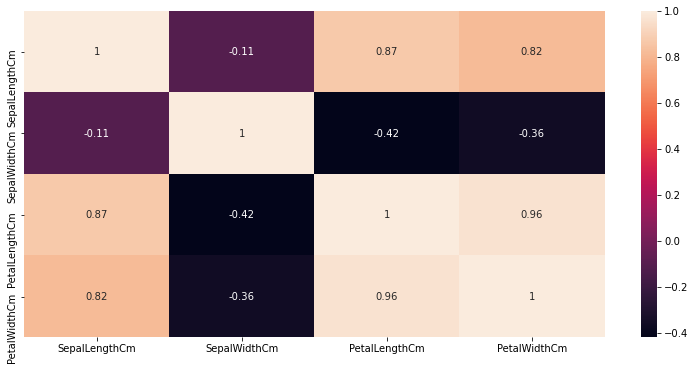

In [10]:
# Finding the co-relation of features.
corr_data=df.corr()
display(corr_data)
plt.subplots(figsize=(13,6))
sns.heatmap(corr_data, annot=True)

Text(0.5, 0, 'PETAL WIDTH')

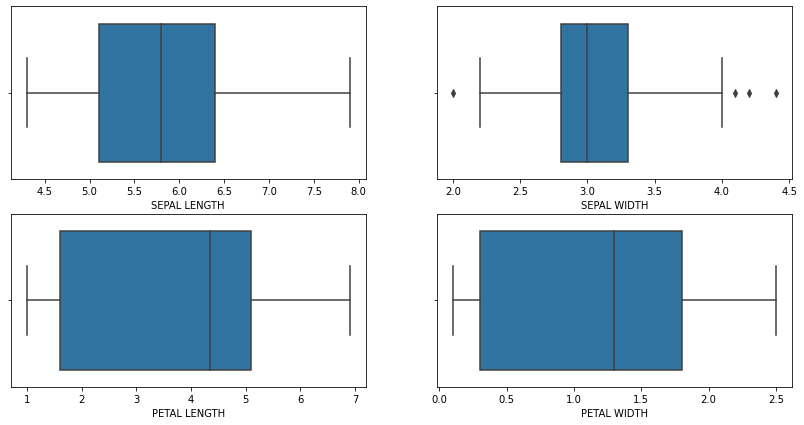

In [11]:
# To check for outliers in feature by plotting boxplot.
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(df['SepalLengthCm'])
plt.xlabel('SEPAL LENGTH')

plt.subplot(2,2,2)
sns.boxplot(df['SepalWidthCm'])
plt.xlabel('SEPAL WIDTH')

plt.subplot(2,2,3)
sns.boxplot(df['PetalLengthCm'])
plt.xlabel('PETAL LENGTH')

plt.subplot(2,2,4)
sns.boxplot(df['PetalWidthCm'])
plt.xlabel('PETAL WIDTH')

# There are no outliers present.

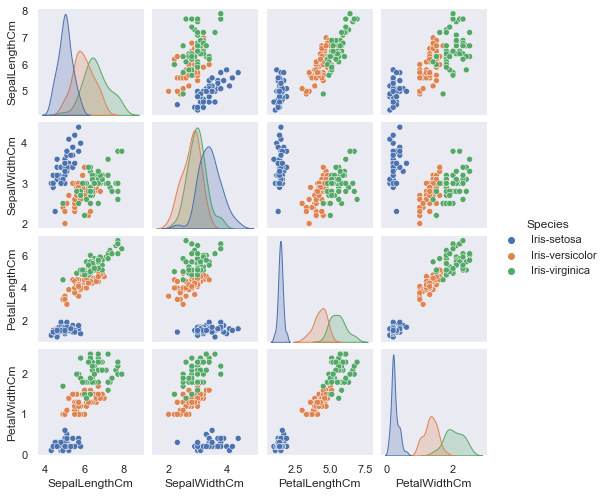

In [12]:
sns.set(style='dark')
sns.pairplot(df, hue='Species', size=1.75)
plt.show()

# Feature Encoding for categorical feature.

In [13]:
data=LabelEncoder()
df['Species']=data.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# For visualization and grouping purpose, only four features are necessary, which are selected and assigned to X.
X = df.iloc[ : , 0:4].values

# Feature Scaling of data.

In [15]:
sc=StandardScaler()
scaled_df=sc.fit_transform(X)

In [16]:
pd.DataFrame(scaled_df)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# Elbow Method for optimum number of clusters using KMeans

In [17]:
wcss=[]
for k in range(1,21):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.6822160993797,
 91.19197002146461,
 80.19300510158155,
 71.3007056411862,
 62.45268372832474,
 54.31087378179731,
 47.61654626377583,
 42.89714274774881,
 39.381803903690056,
 36.66091783913286,
 35.68518522023264,
 34.06848011740923,
 30.57624467155309,
 29.099189584234765,
 27.93077340857486,
 26.494634200076906,
 25.206670137779508]

# Plotting the Elbow Curve.

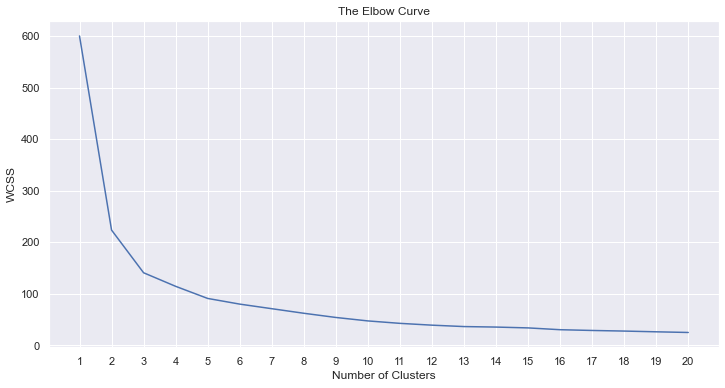

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss)
plt.title("The Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,21))
plt.grid()
plt.show()

# From the above figure, it is clear that we should take number of clusters equal to 3 as model argument. Because the slope of the curve is not steep enough after 3.

# Modelling using KMeans Clustering

In [20]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=0)

In [21]:
y_kmeans=kmeans.fit_predict(scaled_df)

In [22]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

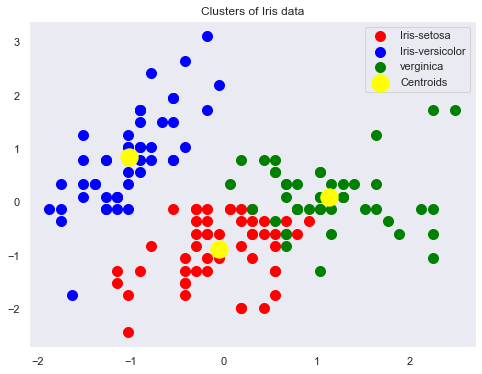

In [23]:
# Visualizing the clusters.
plt.figure(figsize=(8,6))
plt.scatter(scaled_df[y_kmeans == 0,0], scaled_df[y_kmeans == 0,1], 
            s=100, c='red', label='Iris-setosa')

plt.scatter(scaled_df[y_kmeans == 1,0], scaled_df[y_kmeans == 1,1], 
            s=100, c='blue', label='Iris-versicolor')

plt.scatter(scaled_df[y_kmeans == 2,0], scaled_df[y_kmeans == 2,1], 
            s=100, c='green', label='verginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of Iris data')
plt.legend()
plt.show()

# This figure showing the clusters present in the given dataset among species setosa, versicolor, virginica.